In [37]:
library(ggplot2)
library(RColorBrewer)
library(circlize)

In [19]:
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)

In [20]:
df_pcs = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_tsne.csv", row.names=1)

In [21]:
cells0 = rownames(df)
df_pcs = df_pcs[cells0,]

In [22]:
colnames(df) = gsub("_\\.","-",colnames(df))
colnames(df) = gsub("-.*","",colnames(df))
colnames(df) = gsub("\\.","-",colnames(df))

In [23]:
head(df,2)

,ABHD10,ABHD12B,ACKR2,ADD2,ADSL,AIM1L,AKAP7,ALDH7A1,ANKRD18B,APIP,...,YWHAE,ZBBX,ZC3HAV1,ZFR2,ZG16B,ZNF423,ZNF552,ZNF738,ZNF77,ZP3
HPSI0714i-iudw_1--DA--d30--0,-0.2108622,0.003924475,0.02206444,0.02834211,0.2235163,-0.03575032,-0.09473256,0.006901295,0.0006737957,-0.07499119,...,0.06962421,0.1120253,-0.04172133,0.01126897,0.1057579,-0.03101814,0.0909417,0.3020245,-0.1583842,-0.05596878
HPSI0714i-iudw_1--DA--d30--1,-0.2283969,-0.047217741,0.10596178,0.02514689,-0.1921801,-0.01471768,0.01878961,-0.171038975,-0.1105473675,-0.18686595,...,-0.21070417,0.3759854,0.08774666,0.02505916,-0.1950055,-0.22780547,0.0775938,0.3452492,-0.3472152,-0.15259400


In [24]:
genes = c("WNT3","TBCA","CERS5","AIM1L","APIP","PEX6","CCDC80","GSTT1","FAM153B","CD14","SLC44A2","CRB2")

In [28]:
##############################################################################
##############################################################################
##############################################################################
##############################################################################

In [29]:
### betaG's across cells from model 
df_beta = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_persistent_genetic_effect_all.txt", sep="\t",row.names = 1)
head(df_beta,2)

,beta_G
ABHD10-3_111697439_T_G,0.3034083
ABHD12B-14_51328222_C_T,-0.1078338


In [30]:
rownames(df_beta) = gsub("-.*","",rownames(df_beta))
head(df_beta,2)

,beta_G
ABHD10,0.3034083
ABHD12B,-0.1078338


In [31]:
###### Plot beta_G + beta_GxC, different scale for each

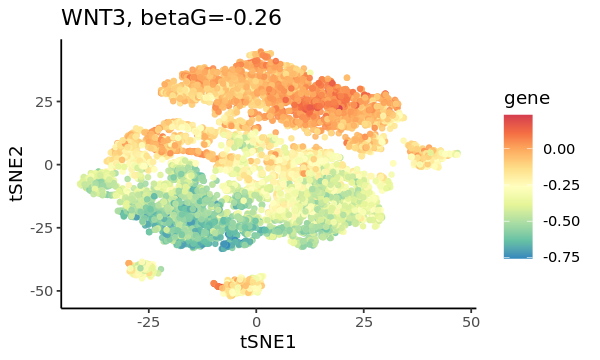

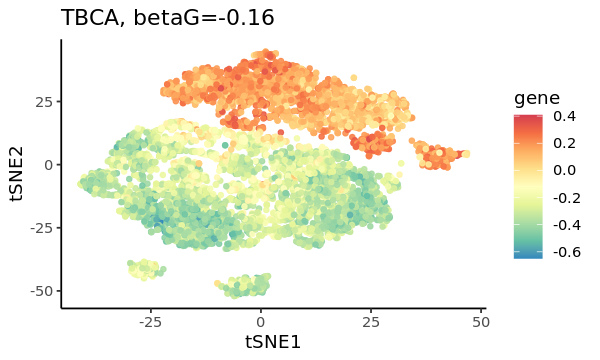

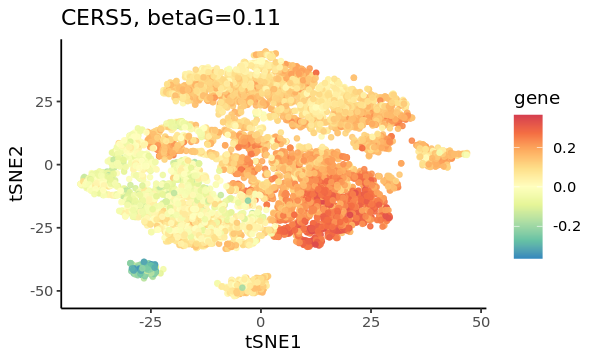

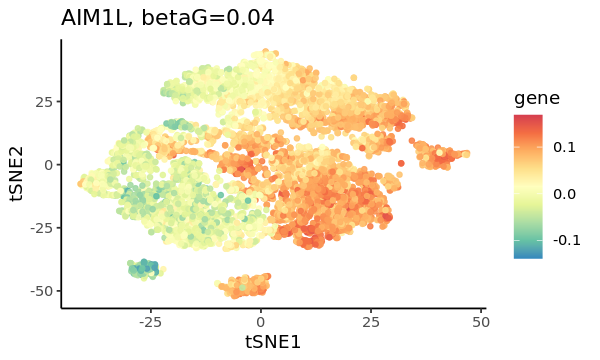

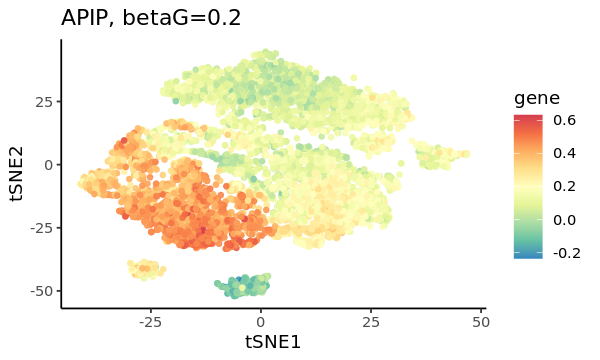

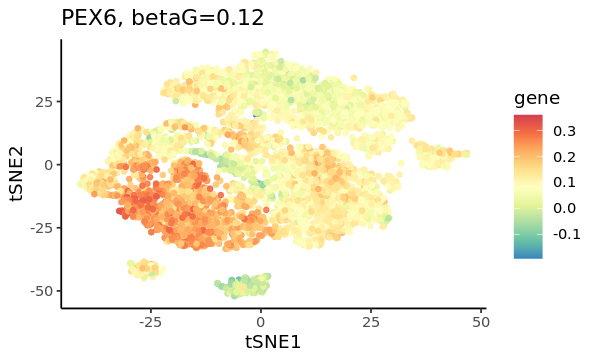

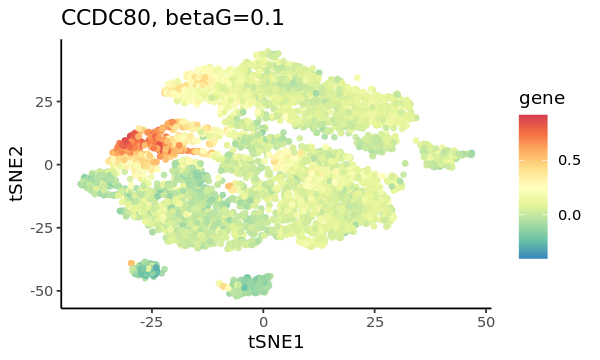

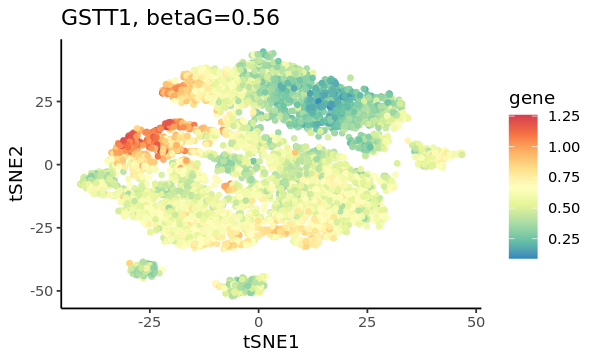

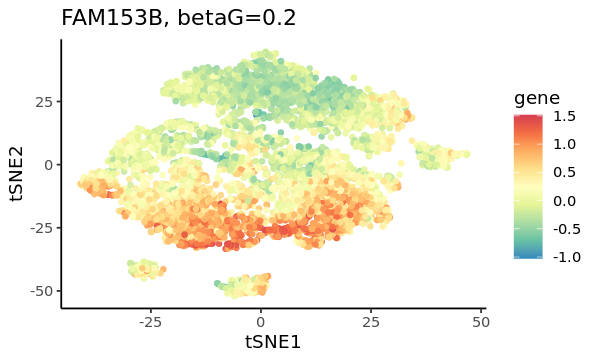

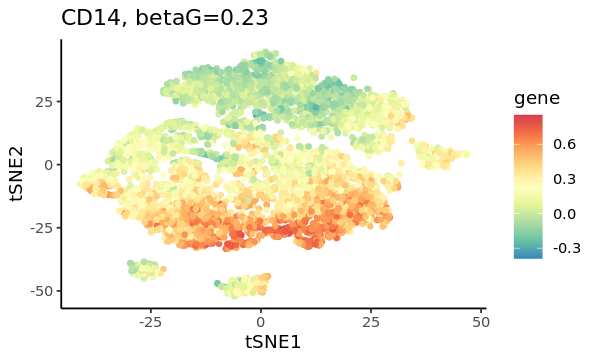

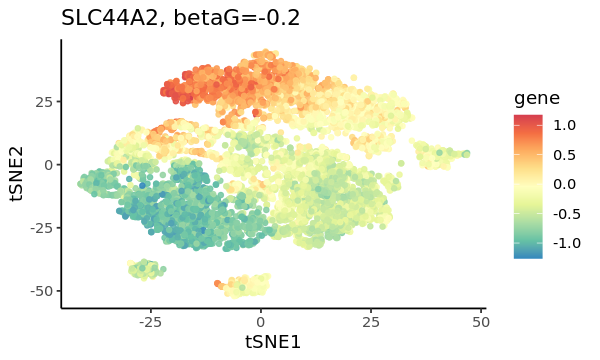

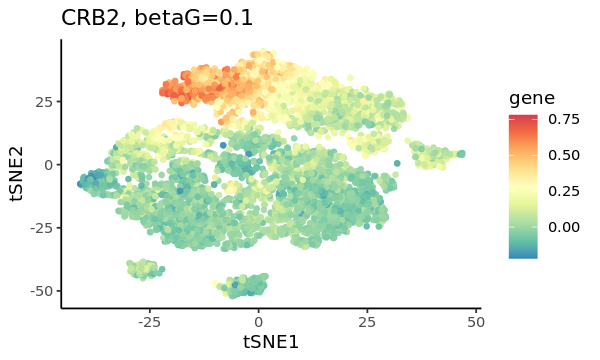

In [33]:
options(repr.plot.width = 5, repr.plot.height = 3)
for (gene in genes){
#     print(gene)
    df_to_plot = cbind(df_pcs[,c("tSNE1","tSNE2")], data.frame(gene = df_beta[gene,]+df[,gene]))
#     print(head(df_to_plot))
    p = ggplot(df_to_plot, aes(x = tSNE1, y = tSNE2, col = gene)) 
    p = p + geom_point(alpha = 0.9, size = 1.2) + ggtitle(paste0(gene, ", betaG=", round(df_beta[gene,], digits=2)))
    p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
    print(p)
}